# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [57]:
corona_dataset_csv =pd.read_csv("covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [58]:
corona_dataset_csv.shape

(266, 104)

### Task 2.2: Delete the useless columns

In [59]:
corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [60]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Task 2.3: Aggregating the rows by the country

In [61]:
corona_dataset_aggregated= corona_dataset_csv.groupby("Country/Region").sum()

In [62]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [63]:
corona_dataset_aggregated.shape

(187, 100)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

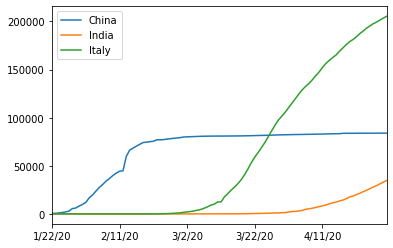

In [64]:
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

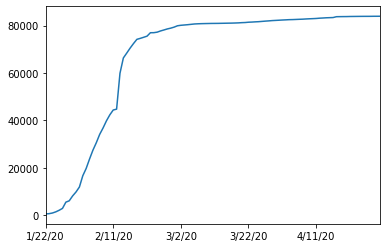

In [65]:
corona_dataset_aggregated.loc['China'].plot()

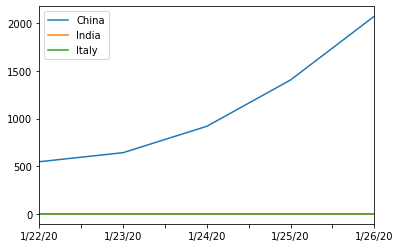

In [66]:
corona_dataset_aggregated.loc["China"][:5].plot()
corona_dataset_aggregated.loc["India"][:5].plot()
corona_dataset_aggregated.loc["Italy"][:5].plot()
plt.legend()

### task 3.1: caculating the first derivative of the curve

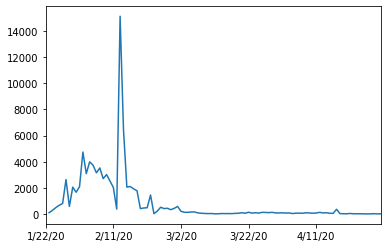

In [67]:
corona_dataset_aggregated.loc["China"].diff().plot()

### task 3.2: find maxmimum infection rate for China

In [68]:
corona_dataset_aggregated.loc["China"].diff().max()

15136.0

In [69]:
corona_dataset_aggregated.loc["India"].diff().max()

1893.0

In [70]:
corona_dataset_aggregated.loc["Spain"].diff().max()

9630.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [71]:
countries= list(corona_dataset_aggregated.index)
max_infection_rates=[]
for country in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated["max_infection_rate"]=max_infection_rates

In [72]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


### Task 3.4: create a new dataframe with only needed column 

In [73]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [74]:
corona_data.head(10)

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
Antigua and Barbuda,6.0
Argentina,291.0
Armenia,134.0
Australia,497.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [75]:
happiness_report_csv = pd.read_csv("worldwide_happiness_report.csv")

In [76]:
happiness_report_csv

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


### Task 4.2: let's drop the useless columns 

In [77]:
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [78]:
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)

### Task 4.3: changing the indices of the dataframe

In [79]:
happiness_report_csv.set_index("Country or region",inplace =True)

In [80]:
happiness_report_csv.head(15)

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
Switzerland,1.452,1.526,1.052,0.572
Sweden,1.387,1.487,1.009,0.574
New Zealand,1.303,1.557,1.026,0.585
Canada,1.365,1.505,1.039,0.584


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [81]:
corona_data.head(4)
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [82]:
happiness_report_csv.shape

(156, 4)

In [83]:
data =corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 4.5: correlation matrix 

In [84]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [85]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

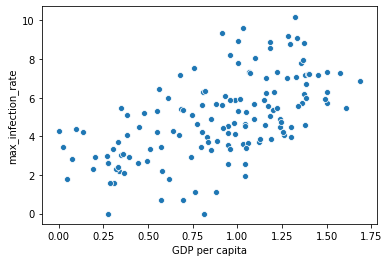

In [86]:
x=data["GDP per capita"]
y= data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

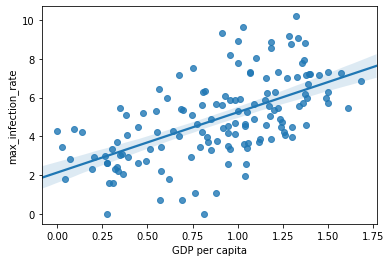

In [87]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

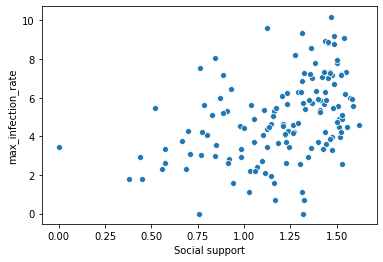

In [88]:
x=data["Social support"]
y= data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

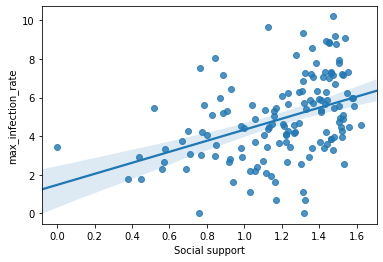

In [89]:
sns.regplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

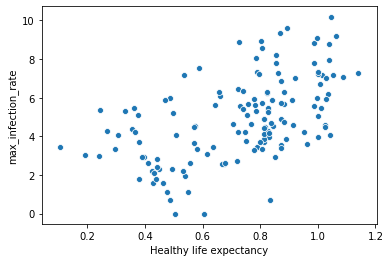

In [90]:
x=data["Healthy life expectancy"]
y= data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

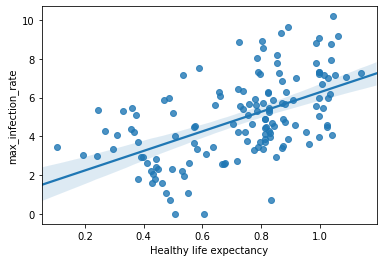

In [91]:
sns.regplot(x,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

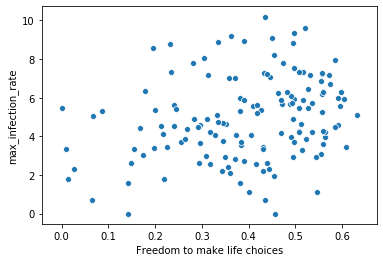

In [92]:
x=data["Freedom to make life choices"]
y= data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

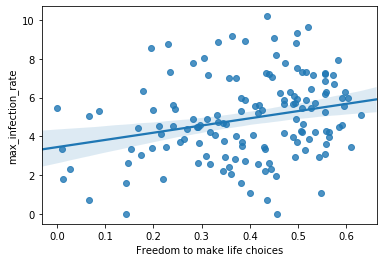

In [93]:
sns.regplot(x,np.log(y))

IMPORTING DEATH DATASET

In [94]:
death_rate_csv =pd.read_csv("covid19_deaths_dataset.csv")

In [95]:
death_rate_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,147,152,165,176,185,192,197,207,214,218
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,24,24,24,27,28,28,29,30,30,32
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,26,26,31,33,33,34,34,39,40,41


In [96]:
death_rate_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [97]:
death_rate_csv


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Yemen,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
264,NaN,Comoros,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
death_dataset_aggregated= death_rate_csv.groupby("Country/Region").sum()

In [99]:
death_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [100]:
death_dataset_aggregated.shape

(187, 100)

In [108]:
countries= list(death_dataset_aggregated.index)
max_death_rates=[]
for country in countries:
    max_death_rates.append(death_dataset_aggregated.loc[country].diff().max())
death_dataset_aggregated["max_death_rates"]=max_infection_rates

In [109]:
death_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate,max_death_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,42,43,47,50,57,58,60,64,7.0,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,28,28,30,30,31,4.0,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,407,415,419,425,432,437,444,450,30.0,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,40,40,40,40,41,42,42,4.0,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,2,2,2,2,2,2,1.0,1.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2.0,2.0


In [111]:
corona_death_data = pd.DataFrame(death_dataset_aggregated["max_death_rates"])

In [112]:
corona_death_data

,max_death_rates
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


In [113]:
total_data =data.join(corona_death_data,how="inner")

In [114]:
total_data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rates
Afghanistan,232.0,0.350,0.517,0.361,0.000,7.0
Albania,34.0,0.947,0.848,0.874,0.383,4.0
Algeria,199.0,1.002,1.160,0.785,0.086,30.0
Argentina,291.0,1.092,1.432,0.881,0.471,13.0
Armenia,134.0,0.850,1.055,0.815,0.283,3.0
...,...,...,...,...,...,...
Venezuela,29.0,0.960,1.427,0.805,0.154,6.0
Vietnam,19.0,0.741,1.346,0.851,0.543,0.0
Yemen,5.0,0.287,1.163,0.463,0.143,2.0
Zambia,9.0,0.578,1.058,0.426,0.431,1.0


In [115]:
total_data.corr

<bound method DataFrame.corr of              max_infection_rate  GDP per capita  Social support  \
Afghanistan               232.0           0.350           0.517   
Albania                    34.0           0.947           0.848   
Algeria                   199.0           1.002           1.160   
Argentina                 291.0           1.092           1.432   
Armenia                   134.0           0.850           1.055   
...                         ...             ...             ...   
Venezuela                  29.0           0.960           1.427   
Vietnam                    19.0           0.741           1.346   
Yemen                       5.0           0.287           1.163   
Zambia                      9.0           0.578           1.058   
Zimbabwe                    8.0           0.366           1.114   

             Healthy life expectancy  Freedom to make life choices  \
Afghanistan                    0.361                         0.000   
Albania                

In [116]:
total_data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_death_rates
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196,0.880597
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603,0.259893
Social support,0.191958,0.759468,1.000000,0.765286,0.456246,0.204148
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892,0.309666
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000,0.080166
max_death_rates,0.880597,0.259893,0.204148,0.309666,0.080166,1.000000


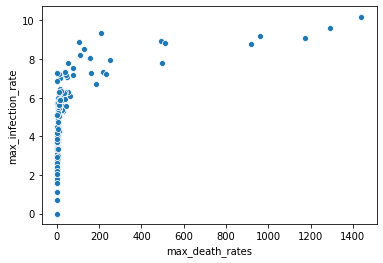

In [118]:
x=total_data["max_death_rates"]
y= total_data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

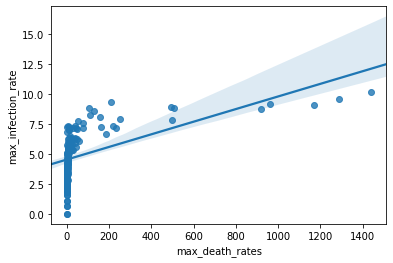

In [119]:
sns.regplot(x,np.log(y))